In [31]:
import pandas as pd
from matplotlib import pyplot as plt

In [32]:
df_dbqh = pd.read_csv('dbqh_new.csv')
df_dbqh.head()

,name,standard_name,birthday,birthplace,religion,gender,keyword,age,province
0,Đoàn Thị Lê An,Đoàn Thị Lê An,26/2/1979,"Xã Chí Thảo, huyện Quảng Hòa, Cao Bằng",Không,Nữ,Đại biểu quốc hội Đoàn Thị Lê An,44,Cao Bằng
1,Dương Văn An,Dương Văn An,15/2/1971,"Xã Phú Hồ, huyện Phú Vang, Thừa Thiên Huế",Không,Nam,Đại biểu quốc hội Dương Văn An,52,Thừa Thiên Huế
2,Lê Thị Song An,Lê Thị Song An,11/10/1977,"Thị trấn Thủ Thừa, huyện Thủ Thừa, Long An",Không,Nữ,Đại biểu quốc hội Lê Thị Song An,45,Long An
3,Nguyễn Văn An,Nguyễn Văn An,30/11/1968,"Xã An Quý, huyện Quỳnh Phụ, Thái Bình",Không,Nam,Đại biểu quốc hội Nguyễn Văn An,54,Thái Bình
4,Trần Thị Hồng An,Trần Thị Hồng An,11/12/1971,"Xã Trực Cát, huyện Trực Ninh, Nam Định",Không,Nữ,Đại biểu quốc hội Trần Thị Hồng An,51,Nam Định


In [33]:
df_giai_tri = pd.read_csv('giai_tri_new.csv')
df_giai_tri.head()

,name,age,keyword,place_of_birth,job
0,Sơn Tùng,29,Ca sĩ Sơn Tùng,Thái Bình,Ca sĩ
1,Khởi My,33,Ca sĩ Khởi My,Đồng Nai,Ca sĩ
2,Hồ Quang Hiếu,37,Ca sĩ Hồ Quang Hiếu,Đắk Lắk,Ca sĩ
3,Thuỷ Tiên,38,Ca sĩ Thuỷ Tiên,Kiên Giang,Ca sĩ
4,Minh Hằng,36,Ca sĩ Minh Hằng,Hồ Chí Minh,Ca sĩ


In [34]:
df_doanh_nhan = pd.read_csv('kinh_doanh.csv')
df_doanh_nhan.head()

,name,age,province
0,Phạm Nhật Vượng,55,Hà Tĩnh
1,Trần Đình Long,62,"Thanh Miện, Hải Dương"
2,Đỗ Anh Tuấn,48,Thanh Hóa
3,Hồ Hùng Anh,53,Thừa Thiên Huế
4,Nguyễn Thị Phương Thảo,53,Hà Nội


In [35]:
# add keyword column for df_doanh_nhan: doanh nhân + name
df_doanh_nhan['keyword'] = df_doanh_nhan['name'].apply(lambda x: 'doanh nhân ' + x)
df_doanh_nhan.head()

,name,age,province,keyword
0,Phạm Nhật Vượng,55,Hà Tĩnh,doanh nhân Phạm Nhật Vượng
1,Trần Đình Long,62,"Thanh Miện, Hải Dương",doanh nhân Trần Đình Long
2,Đỗ Anh Tuấn,48,Thanh Hóa,doanh nhân Đỗ Anh Tuấn
3,Hồ Hùng Anh,53,Thừa Thiên Huế,doanh nhân Hồ Hùng Anh
4,Nguyễn Thị Phương Thảo,53,Hà Nội,doanh nhân Nguyễn Thị Phương Thảo


In [36]:
# merge df_dbqh and df_giai_tri and df_doanh_nhan with 3 columns (name, age, keyword)
df = pd.concat([df_dbqh[['name', 'age', 'keyword']], df_giai_tri[['name', 'age', 'keyword']], df_doanh_nhan[['name', 'age', 'keyword']]])
df.head()

,name,age,keyword
0,Đoàn Thị Lê An,44,Đại biểu quốc hội Đoàn Thị Lê An
1,Dương Văn An,52,Đại biểu quốc hội Dương Văn An
2,Lê Thị Song An,45,Đại biểu quốc hội Lê Thị Song An
3,Nguyễn Văn An,54,Đại biểu quốc hội Nguyễn Văn An
4,Trần Thị Hồng An,51,Đại biểu quốc hội Trần Thị Hồng An


In [37]:
df.shape

(3399, 3)

In [38]:
# drop duplicate rows
df = df.drop_duplicates()
df.shape

(3399, 3)

In [39]:
# create job via keyword and name (keyword remove name in name column)
jobs = df.apply(lambda x: x['keyword'].replace(x['name'], '')[:-1], axis=1).unique()
jobs

array(['Đại biểu quốc hội', 'Ca sĩ', 'Hot girl', 'Diễn viên',
       'doanh nhân'], dtype=object)

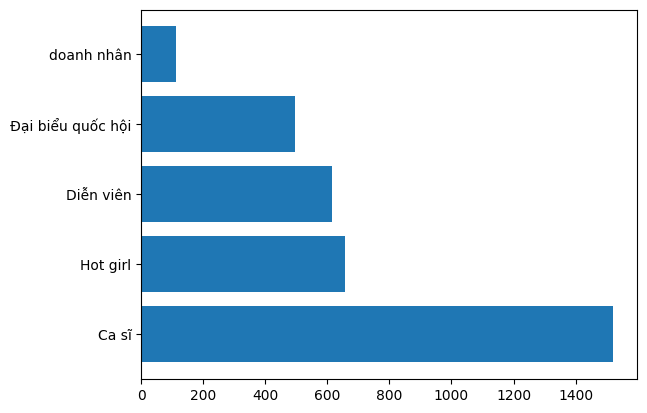

In [46]:
# count jobs
jobs = df.apply(lambda x: x['keyword'].replace(x['name'], '')[:-1], axis=1)
jobs_count = jobs.value_counts() # count jobs
# plot jobs distribution
plt.barh(jobs_count.index, jobs_count.values)
plt.xticks(rotation=0)
plt.show()

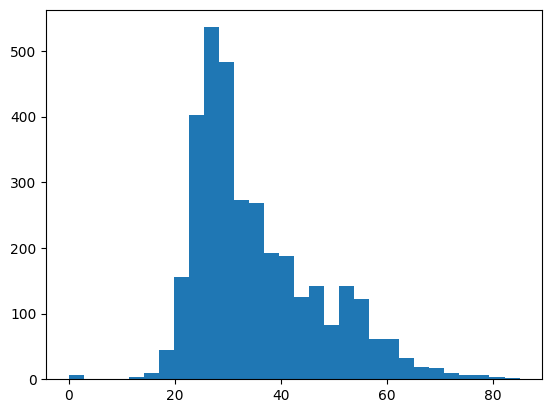

In [49]:
# plot age distribution
plt.hist(df['age'], bins=30)
plt.show()


In [50]:
df.to_csv('name_index.csv', index=False)